In [2]:
import pandas as pd
import gzip
import feather
import json

def parse(path):
  with open(path, 'r') as g:
      for l in g:
        yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('/kaggle/input/amazon-rev-data/amazon-review-data/Electronics_5.json/Electronics_5.json')

In [4]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /kaggle/working/corpora/wordnet.zip


replace /kaggle/working/corpora/wordnet/lexnames? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


In [3]:
import pandas as pd
import gzip
import json
import feather

def parse(path):# feather_path2 = '/kaggle/working/cat_df.feather'
# try:
#     df_meta = pd.read_feather(feather_path2)
#     print("1")
#     print(df_meta.head)
# except FileNotFoundError:
#     print("2")
#     df_meta = getDF('/kaggle/input/metadata/meta_Electronics.json')
#     df_meta.to_feather(feather_path2)
  with open(path, 'r') as g:
      for l in g:
        yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df_meta = getDF('/kaggle/input/metadata/meta_Electronics.json')

In [5]:
df.head

<bound method NDFrame.head of          overall vote  verified   reviewTime      reviewerID        asin  \
0            5.0   67      True  09 18, 1999   AAP7PPBU72QFM  0151004714   
1            3.0    5      True  10 23, 2013  A2E168DTVGE6SV  0151004714   
2            5.0    4     False   09 2, 2008  A1ER5AYS3FQ9O3  0151004714   
3            5.0   13     False   09 4, 2000  A1T17LMQABMBN5  0151004714   
4            3.0    8      True   02 4, 2000  A3QHJ0FXK33OBE  0151004714   
...          ...  ...       ...          ...             ...         ...   
6739585      4.0  NaN      True  03 21, 2017  A33MAQA919J2V8  B01HJH40WU   
6739586      4.0  NaN      True   01 9, 2017  A1AKHSCPD1BHM4  B01HJH40WU   
6739587      5.0    2      True   12 1, 2016  A2HUZO7MQAY5I2  B01HJH40WU   
6739588      5.0    2      True  11 29, 2016   AJJ7VX2L91X2W  B01HJH40WU   
6739589      5.0  NaN      True  03 31, 2017  A1FGCIRPRNZWD5  B01HJF704M   

                                  style      reviewerName

In [6]:
df_meta.head

<bound method NDFrame.head of                                                  category  \
0       [Electronics, Camera &amp; Photo, Video Survei...   
1                       [Electronics, Camera &amp; Photo]   
2       [Electronics, eBook Readers &amp; Accessories,...   
3       [Electronics, eBook Readers & Accessories, eBo...   
4       [Electronics, eBook Readers & Accessories, eBo...   
...                                                   ...   
786440  [Electronics, Portable Audio & Video, MP3 & MP...   
786441  [Electronics, Computers & Accessories, Laptop ...   
786442  [Electronics, Portable Audio & Video, CB & Two...   
786443  [Electronics, Computers & Accessories, Compute...   
786444  [Electronics, Computers & Accessories, Compute...   

                                                    tech1  \
0                                                           
1                                                           
2                                                     

In [7]:
df_cat = df_meta[df_meta['title'].str.contains('console', case=False)]
df_cat.drop_duplicates(subset=['asin'],inplace=True)
print(len(df_cat))
# df_headphones.head
df_filtered_reviews = df[df['asin'].isin(df_cat['asin'])]
print(len(df_filtered_reviews))
# df_merged = df_filtered_reviews.merge(df_cat, on='asin', how='inner')
# df_filtered_reviews=df_merged
# df_filtered_reviews = pd.merge(df, df_cat, on='asin', how='inner')
# print(df_filtered_reviews.head)


/tmp/ipykernel_33/1937285448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop_duplicates(subset=['asin'],inplace=True)


658
5836


In [8]:
df_filtered_reviews = pd.merge(df_filtered_reviews, df_cat, on='asin', how='left')
df_filtered_reviews.shape
# import random
# for i in range(500):
#     num=random.randint(1,5835)
#     print(merged_df['brand'][num],"->", merged_df['asin'][num],"->",num)
#     print("#################################################################################################################################################")


(5836, 30)

In [9]:
df_temp=df[df['asin'].str.contains('B01EAYYJAS',case=False)]
df_temp.head

<bound method NDFrame.head of          overall vote  verified   reviewTime      reviewerID        asin  \
6721260      5.0  NaN      True  07 15, 2018  A2O8EYXZZ1PPYL  B01EAYYJAS   
6721261      5.0  NaN      True  06 23, 2018  A2VS5SQROVJK41  B01EAYYJAS   
6721262      5.0  NaN      True  05 16, 2017   A2V5YMUXFDW7O  B01EAYYJAS   
6721263      5.0  NaN      True  03 10, 2017  A17MUGX4ZWWP0A  B01EAYYJAS   
6721264      5.0  NaN      True  12 19, 2016  A1LFN5TXQ0B1HB  B01EAYYJAS   
6721265      5.0  NaN      True   12 4, 2016  A2GX6X2TDOBEA8  B01EAYYJAS   

        style     reviewerName  \
6721260   NaN       RCodispoti   
6721261   NaN    J. Eric Smith   
6721262   NaN             Jeff   
6721263   NaN  Clayton Michael   
6721264   NaN       Constantin   
6721265   NaN        Travis F.   

                                                reviewText  \
6721260  Pleasantly surprised at the quality of this ca...   
6721261  Works as expected, no driver needed on my Mac ...   
6721262  Con

In [10]:
# Import pandas
import pandas as pd

total_rows = len(df_filtered_reviews) 
print("Number of reviews:", total_rows)
# Calculate Average Rating Score
average_rating = df_filtered_reviews['overall'].mean()
print("Average Rating Score:", average_rating)

# Calculate Number of Unique Products
num_unique_products = df_filtered_reviews['asin'].nunique()
print("Number of Unique Products:", num_unique_products)

# Calculate Number of Good Ratings (>=3)
good_ratings = df_filtered_reviews[df_filtered_reviews['overall'] >= 3]['overall'].count()
print("Number of Good Ratings:", good_ratings)

# Calculate Number of Bad Ratings (<3)
bad_ratings = df_filtered_reviews[df_filtered_reviews['overall'] < 3]['overall'].count()
print("Number of Bad Ratings:", bad_ratings)

# Calculate Number of Reviews corresponding to each Rating
rating_counts = df_filtered_reviews['overall'].value_counts().sort_index()
print("\nNumber of Reviews corresponding to each Rating:")
print(rating_counts)


Number of reviews: 5836
Average Rating Score: 4.3658327621658675
Number of Unique Products: 145
Number of Good Ratings: 5255
Number of Bad Ratings: 581

Number of Reviews corresponding to each Rating:
overall
1.0     368
2.0     213
3.0     344
4.0     902
5.0    4009
Name: count, dtype: int64


In [11]:
from bs4 import BeautifulSoup
from unidecode import unidecode
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import math
import pickle

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def ch(text):
    if(text[0]=="<"):
        print(text)
def remove_accented_chars(text):
    return unidecode(text)

def remove_special_characters(text):
    pattern = r'[^a-zA-z\s]'
    return re.sub(pattern, '', text)

def lemmatize_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [porter.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

def normalize_text(text):
    return text.lower()

# Fill missing values in 'reviewText' column with an empty string
df_filtered_reviews['reviewText'] = df_filtered_reviews['reviewText'].fillna('')

# Apply preprocessing functions
df_filtered_reviews['reviewText'] = df_filtered_reviews['reviewText'].apply(remove_html_tags)
df_filtered_reviews['reviewText'] = df_filtered_reviews['reviewText'].apply(remove_accented_chars)
df_filtered_reviews['reviewText'] = df_filtered_reviews['reviewText'].apply(remove_special_characters)
df_filtered_reviews['reviewText'] = df_filtered_reviews['reviewText'].apply(lemmatize_text)
df_filtered_reviews['reviewText'] = df_filtered_reviews['reviewText'].apply(normalize_text)
# df_filtered_reviews['reviewText'] = df_filtered_reviews['reviewText'].apply(ch)



[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/tmp/ipykernel_33/342900710.py:21: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
/tmp/ipykernel_33/342900710.py:21: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [12]:
# Top 20 most reviewed brands
top_20_most_reviewed = df_filtered_reviews['brand'].value_counts().head(20)
print("Top 20 Most Reviewed Brands:")
print(top_20_most_reviewed)


# Top 20 least reviewed brands`
top_20_least_reviewed = df_filtered_reviews['brand'].value_counts().tail(20)
print("Top 20 Least Reviewed Brands:")
print(top_20_least_reviewed)



average_ratings = df_filtered_reviews.groupby('asin')['overall'].mean()
# Sort average ratings in descending order
sorted_average_ratings = average_ratings.sort_values(ascending=False)
# Get the most positively reviewed console (first row after sorting)
most_positively_reviewed_console = sorted_average_ratings.index[0]
print("ASIN:", most_positively_reviewed_console)
print(df_filtered_reviews[df_filtered_reviews['asin'] == most_positively_reviewed_console])





Top 20 Most Reviewed Brands:
brand
Plugable                 606
ORIA                     604
BenQ                     576
Logitech                 374
Panlong                  271
Belkin                   242
Cellnorth Electronics    237
by\n    \n    TOMSENN    186
Cisco                    181
Asunflower               172
HDE                      169
StarTech                 139
Fosmon                   129
UGREEN                   129
Alienware                114
hossen                   109
Creative                  84
E-sds                     84
Edimax                    81
Pyle                      80
Name: count, dtype: int64
Top 20 Least Reviewed Brands:
brand
TRENDnet                   6
IOGEAR                     6
InterlinkAuckland          6
MOCREO                     6
ULBRE                      6
Bose                       5
Stuff4                     5
Hausbel                    5
Rocketfish                 5
2gig                       5
Crosley                    5
LiKe

In [13]:
import pandas as pd

# Convert 'unixReviewTime' to datetime format
df_filtered_reviews['reviewYear'] = pd.to_datetime(df_filtered_reviews['unixReviewTime'], unit='s').dt.year
# print(df_filtered_reviews.head)
# Filter the DataFrame to include only rows for the most positively reviewed console
# most_positively_reviewed_console_reviews = df_filtered_reviews[df_filtered_reviews['asin'] == most_positively_reviewed_console]

# Group by year and count the number of ratings for each year
ratings_count_per_year = df_filtered_reviews.groupby('reviewYear').size()

# Generate consecutive years for the last 5 years
consecutive_years = range(ratings_count_per_year.index.max() - 4, ratings_count_per_year.index.max() + 1)

# Display the count of ratings for each of the 5 consecutive years
print("Count of Ratings for Most Positively Reviewed Console Over 5 Consecutive Years:")
for year in consecutive_years:
    if year in ratings_count_per_year.index:
        print(f"Year {year}: {ratings_count_per_year.loc[year]} ratings")
    else:
        print(f"Year {year}: 0 ratings")


Count of Ratings for Most Positively Reviewed Console Over 5 Consecutive Years:
Year 2014: 749 ratings
Year 2015: 1144 ratings
Year 2016: 1296 ratings
Year 2017: 1201 ratings
Year 2018: 769 ratings


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Function to preprocess text
def preprocess_text(text):
    # Tokenize text into words
    words = word_tokenize(text)
    
    # Convert words to lowercase
    words = [word.lower() for word in words]
    
    # Remove punctuation
    words = [word for word in words if word not in string.punctuation]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(words)

# Filter DataFrame into "Good" and "Bad" ratings
good_ratings_df = df_filtered_reviews[df_filtered_reviews['overall'] > 3.0]
bad_ratings_df = df_filtered_reviews[df_filtered_reviews['overall'] <= 3.0]

# Preprocess "Good" and "Bad" reviews
good_reviews_text = ' '.join(good_ratings_df['reviewText'].apply(preprocess_text))
bad_reviews_text = ' '.join(bad_ratings_df['reviewText'].apply(preprocess_text))

# Generate Word Cloud for "Good" ratings
good_wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(good_reviews_text)

# Generate Word Cloud for "Bad" ratings
bad_wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(bad_reviews_text)

# Plot Word Clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(good_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Good Ratings')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bad_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Bad Ratings')
plt.axis('off')

plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


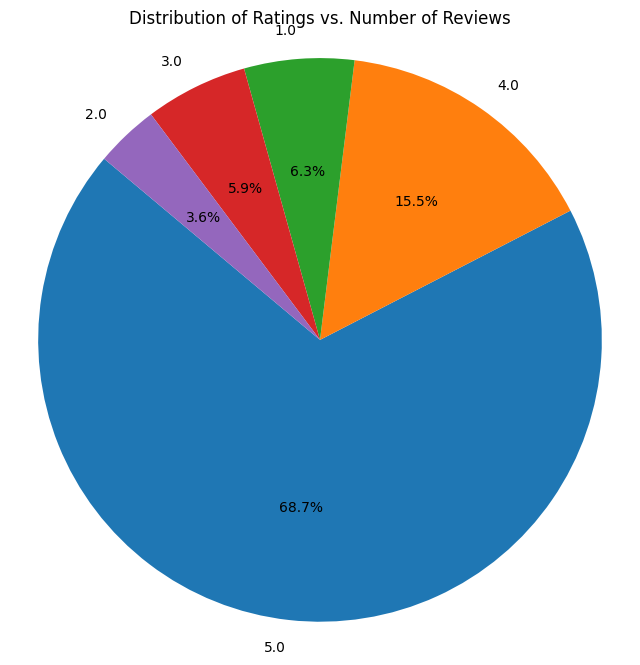

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique rating
rating_counts = df_filtered_reviews['overall'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings vs. Number of Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [ ]:
# Group the reviews by 'reviewYear' and count the number of reviews for each year
reviews_per_year = df_filtered_reviews['reviewYear'].value_counts()

# Find the year with the maximum number of reviews
max_reviews_year = reviews_per_year.idxmax()
max_reviews_count = reviews_per_year.max()

# Report the year with the maximum reviews
print(f"The year with the maximum reviews is {max_reviews_year} with {max_reviews_count} reviews.")


The year with the maximum reviews is 2016 with 1296 reviews.


In [ ]:
# Convert 'unixReviewTime' to datetime format
verified_reviews = df_filtered_reviews[df_filtered_reviews['verified'] == True]
customers_per_year_verified = verified_reviews.groupby('reviewYear')['reviewerID'].nunique()

# Find the year with the highest number of customers
max_customers_year_verified = customers_per_year_verified.idxmax()
max_customers_count_verified = customers_per_year_verified.max()

print("Year with the Highest Number of Customers (Considering Verified Reviews Only):")
print(f"Year: {max_customers_year_verified}, Number of Customers: {max_customers_count_verified}")


Year with the Highest Number of Customers (Considering Verified Reviews Only):
Year: 2016, Number of Customers: 1163


In [ ]:
df_filtered_reviews.head

<bound method NDFrame.head of       overall vote  verified   reviewTime      reviewerID        asin style  \
0         5.0    3     False  05 21, 2006  A22PIR1HSZUNYH  B00006345I   NaN   
1         5.0   39     False  10 16, 2004  A3I1BJIFFM4S21  B00006345I   NaN   
2         1.0  NaN      True   05 4, 2011   AGD6MEWQUMLEV  B00006345I   NaN   
3         5.0    6     False   12 2, 2010  A29HBL2VVSIB3P  B00006345I   NaN   
4         1.0    2     False  10 25, 2010  A20R03APZ2ITKR  B00006345I   NaN   
...       ...  ...       ...          ...             ...         ...   ...   
5831      4.0  NaN      True  08 27, 2018  A35UN8P5NBNU2K  B01GYDMYB4   NaN   
5832      5.0  NaN      True  07 22, 2018  A3DHHNX9IM4ZE3  B01GYDMYB4   NaN   
5833      5.0  NaN      True  04 30, 2018  A1VOS7Z52ODD7S  B01GYDMYB4   NaN   
5834      4.0  NaN      True  03 29, 2018  A2WBQ18YJ2CYYF  B01GYDMYB4   NaN   
5835      3.0  NaN      True  03 28, 2018   ALNP1CMFHPPOY  B01GYDMYB4   NaN   

             reviewer

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text to TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(df_filtered_reviews['reviewText'])

# Get the feature names (words) from the TF-IDF Vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert TF-IDF matrix to a DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Print the shape of TF-IDF matrix
print("Shape of TF-IDF Matrix:")
print(tfidf_df.head)
# df_temp2=tfidf_df[tfidf_df['aa']>0]
# print(df_temp2)

Shape of TF-IDF Matrix:
<bound method NDFrame.head of        aa  aaa  aac  aaron  aaxa  abcd  abil  abl  abnorm  abou  ...  zip  \
0     0.0  0.0  0.0    0.0   0.0   0.0   0.0  0.0     0.0   0.0  ...  0.0   
1     0.0  0.0  0.0    0.0   0.0   0.0   0.0  0.0     0.0   0.0  ...  0.0   
2     0.0  0.0  0.0    0.0   0.0   0.0   0.0  0.0     0.0   0.0  ...  0.0   
3     0.0  0.0  0.0    0.0   0.0   0.0   0.0  0.0     0.0   0.0  ...  0.0   
4     0.0  0.0  0.0    0.0   0.0   0.0   0.0  0.0     0.0   0.0  ...  0.0   
...   ...  ...  ...    ...   ...   ...   ...  ...     ...   ...  ...  ...   
5831  0.0  0.0  0.0    0.0   0.0   0.0   0.0  0.0     0.0   0.0  ...  0.0   
5832  0.0  0.0  0.0    0.0   0.0   0.0   0.0  0.0     0.0   0.0  ...  0.0   
5833  0.0  0.0  0.0    0.0   0.0   0.0   0.0  0.0     0.0   0.0  ...  0.0   
5834  0.0  0.0  0.0    0.0   0.0   0.0   0.0  0.0     0.0   0.0  ...  0.0   
5835  0.0  0.0  0.0    0.0   0.0   0.0   0.0  0.0     0.0   0.0  ...  0.0   

      zipper  zipti  

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Step 1: Preprocess the Text Data
# Assuming 'preprocessed_text' column already exists

# Step 2: Create Target Variable
def categorize_rating(rating):
    if rating > 3:
        return 'Good'
    elif rating == 3:
        return 'Average'
    else:
        return 'Bad'

df_filtered_reviews['Rating Class'] = df_filtered_reviews['overall'].apply(categorize_rating)

# Step 3: Split the Data
X = df_filtered_reviews['reviewText']
y = df_filtered_reviews['Rating Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 4: Initialize and Train Machine Learning Models
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Classifier": SVC(kernel='linear', random_state=42),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42)
}

# Train and Evaluate Models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_tfidf, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_tfidf)
    
    # Classification Report
    report = classification_report(y_test, y_pred)
    print(f"\n{name} Classification Report:")
    print(report)
    print("="*70)


Training Logistic Regression...


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

     Average       0.00      0.00      0.00        99
         Bad       0.78      0.31      0.45       143
        Good       0.86      1.00      0.93      1217

    accuracy                           0.86      1459
   macro avg       0.55      0.44      0.46      1459
weighted avg       0.80      0.86      0.82      1459

Training Random Forest...

Random Forest Classification Report:
              precision    recall  f1-score   support

     Average       0.29      0.02      0.04        99
         Bad       0.83      0.21      0.34       143
        Good       0.85      0.99      0.92      1217

    accuracy                           0.85      1459
   macro avg       0.66      0.41      0.43      1459
weighted avg       0.81      0.85      0.80      1459

Training Support Vector Classifier...

Support Vector Classifier Classification Report:
              precision    recall  f1-scor

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

     Average       0.67      0.02      0.04        99
         Bad       0.68      0.28      0.40       143
        Good       0.86      0.99      0.92      1217

    accuracy                           0.86      1459
   macro avg       0.74      0.43      0.45      1459
weighted avg       0.83      0.86      0.81      1459



In [21]:
# Create the user-item matrix
user_item_matrix = df_filtered_reviews.pivot_table(index='reviewerID', columns='asin', values='overall', fill_value=0)
# print(user_item_matrix['B00006345I']['A22PIR1HSZUNYH'])
print("User-Item Rating Matrix:")
user_item_matrix


User-Item Rating Matrix:


asin,B00006345I,B0001Q2DKS,B000637RN4,B000637RPC,B0006PU71G,B0006U3ACY,B0009Y2EXI,B000AADPNO,B000B6MLRS,B000CDLJ28,...,B01E8X5SYC,B01EAYYJAS,B01EFVB1PM,B01EO7MDX6,B01FMPI26G,B01FTAKQYU,B01G37GSX6,B01GEBINUC,B01GYDMYB4,B01H5KKRLY
reviewerID,,,,,,,,,,,,,,,,,,,,,
A100IX1FUK5IAW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A102ASNDNXLYU2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A102I8TQ9R7KFY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105HM49V1M1FV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A108AVZFCZ3UWD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZYBGWK48FCO7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZYK0RRTJOCVY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZYQXN79IHDYO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
min_rating = user_item_matrix.min().min()  # Minimum rating in the entire matrix
max_rating = user_item_matrix.max().max()  # Maximum rating in the entire matrix
print(min_rating)
print(max_rating)
# Min-Max Scaling Function
def min_max_scale(rating):
    return (rating - min_rating) / (max_rating - min_rating)

# Apply Min-Max Scaling to all ratings in the matrix
user_item_matrix_scaled = user_item_matrix.map(min_max_scale)

print("Normalized User-Item Rating Matrix:")
print(user_item_matrix_scaled)

0.0
5.0
Normalized User-Item Rating Matrix:
asin            B00006345I  B0001Q2DKS  B000637RN4  B000637RPC  B0006PU71G  \
reviewerID                                                                   
A100IX1FUK5IAW         0.0         0.0         0.0         0.0         0.0   
A102ASNDNXLYU2         0.0         0.0         0.0         0.0         0.0   
A102I8TQ9R7KFY         0.0         0.0         0.0         0.0         0.0   
A105HM49V1M1FV         0.0         0.0         0.0         0.0         0.0   
A108AVZFCZ3UWD         0.0         0.0         0.0         0.0         0.0   
...                    ...         ...         ...         ...         ...   
AZYBGWK48FCO7          0.0         0.0         0.0         0.0         0.0   
AZYK0RRTJOCVY          0.0         0.0         0.0         0.0         0.0   
AZYQXN79IHDYO          0.0         0.0         0.0         0.0         0.0   
AZYTO7IPPCPUM          0.0         0.0         0.0         0.0         0.0   
AZYXC9CSKHJLI       

In [23]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
# Function to find top N similar users based on cosine similarity


def find_similar_users(user, N=10):
    # Calculate cosine similarity between the given user and all other users
    similarities = cosine_similarity([user_item_matrix.loc[user]], user_item_matrix)[0]
    
    # Sort users based on similarity (higher values first)
    similar_users = user_item_matrix.index[np.argsort(similarities)[::-1][1:N+1]]  # Exclude the user itself
    
    return similar_users
# Create the user-item matrix
user_item_matrix = df_filtered_reviews.pivot_table(index='reviewerID', columns='asin', values='overall', fill_value=0)
# print(user_item_matrix['B00006345I']['A22PIR1HSZUNYH'])
print("User-Item Rating Matrix:")
print(user_item_matrix)
# Test the function for a user
user = 'A100IX1FUK5IAW'
N_values = [10, 20, 30, 40, 50]

for N in N_values:
    similar_users = find_similar_users(user, N)
    print(f"Top {N} similar users to '{user}':")
    print(similar_users)
#     for user in similar_users:
#         print(user_item_matrix.loc[user])
    print()


User-Item Rating Matrix:
asin            B00006345I  B0001Q2DKS  B000637RN4  B000637RPC  B0006PU71G  \
reviewerID                                                                   
A100IX1FUK5IAW         0.0         0.0         0.0         0.0         0.0   
A102ASNDNXLYU2         0.0         0.0         0.0         0.0         0.0   
A102I8TQ9R7KFY         0.0         0.0         0.0         0.0         0.0   
A105HM49V1M1FV         0.0         0.0         0.0         0.0         0.0   
A108AVZFCZ3UWD         0.0         0.0         0.0         0.0         0.0   
...                    ...         ...         ...         ...         ...   
AZYBGWK48FCO7          0.0         0.0         0.0         0.0         0.0   
AZYK0RRTJOCVY          0.0         0.0         0.0         0.0         0.0   
AZYQXN79IHDYO          0.0         0.0         0.0         0.0         0.0   
AZYTO7IPPCPUM          0.0         0.0         0.0         0.0         0.0   
AZYXC9CSKHJLI          0.0         0.0 

User-Item Rating Matrix:
asin            B00006345I  B0001Q2DKS  B000637RN4  B000637RPC  B0006PU71G  \
reviewerID                                                                   
A100IX1FUK5IAW         0.0         0.0         0.0         0.0         0.0   
A102ASNDNXLYU2         0.0         0.0         0.0         0.0         0.0   
A102I8TQ9R7KFY         0.0         0.0         0.0         0.0         0.0   
A105HM49V1M1FV         0.0         0.0         0.0         0.0         0.0   
A108AVZFCZ3UWD         0.0         0.0         0.0         0.0         0.0   
...                    ...         ...         ...         ...         ...   
AZYBGWK48FCO7          0.0         0.0         0.0         0.0         0.0   
AZYK0RRTJOCVY          0.0         0.0         0.0         0.0         0.0   
AZYQXN79IHDYO          0.0         0.0         0.0         0.0         0.0   
AZYTO7IPPCPUM          0.0         0.0         0.0         0.0         0.0   
AZYXC9CSKHJLI          0.0         0.0 

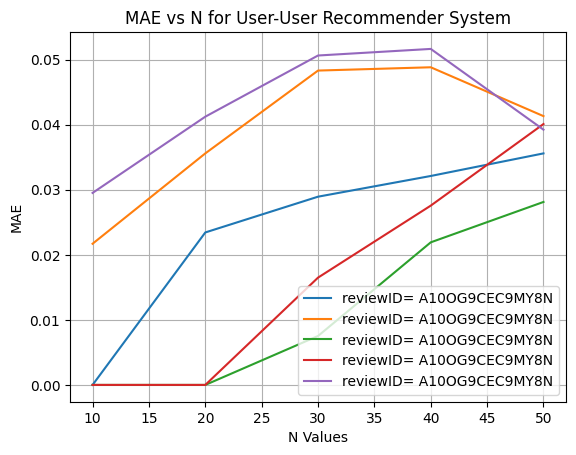

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
# Function to calculate MAE for User-User Recommender System
def user_user_recommendation(usert):
    mae_scores = []
    dict_mae = {}
    for N in N_values:
        maes = []
        similar_users = find_similar_users(usert, N)
        train_users, val_users = train_test_split(similar_users, test_size=0.2, random_state=42)
        for item in user_item_matrix.columns:
            if user_item_matrix.loc[usert, item] == 0:  # For items not rated by user
                predicted_ratings = []   
                for train_user in train_users:
                    predicted_ratings.append(user_item_matrix.loc[train_user, item])      
                predicted_rating = np.mean(predicted_ratings)
                actual_ratings = []   
                for train_user in val_users:
                    actual_ratings.append(user_item_matrix.loc[train_user, item])      
                actual_rating = np.mean(actual_ratings)
                maes.append(abs(actual_rating - predicted_rating))
        mae = np.mean(maes)
        dict_mae[N] = mae
        mae_scores.append(mae)
    
    if any(m > 0 for m in mae_scores):  # Check if any MAE is greater than 0
        return dict_mae, np.mean(mae_scores)
    else:
        return None, None

# Function to find top N similar users based on cosine similarity
def find_similar_users(user, N=10):
    # Calculate cosine similarity between the given user and all other users
    similarities = cosine_similarity([user_item_matrix.loc[user]], user_item_matrix)[0]
    
    # Sort users based on similarity (higher values first)
    similar_users = user_item_matrix.index[np.argsort(similarities)[::-1][1:N+1]]  # Exclude the user itself
    
    return similar_users
# Create the user-item matrix
user_item_matrix = df_filtered_reviews.pivot_table(index='reviewerID', columns='asin', values='overall', fill_value=0)
# print(user_item_matrix['B00006345I']['A22PIR1HSZUNYH'])
print("User-Item Rating Matrix:")
print(user_item_matrix)
N_values = [10, 20, 30, 40, 50]
user = 'A100IX1FUK5IAW'
mae_data = []  # List to store MAE data for plotting

for usert in user_item_matrix.index[:20]:
    mae = user_user_recommendation(usert)
    if mae[0] is not None:  # Check if MAE data is available
        print(f"MAE for User-User Recommender System with reviewID={usert}: {mae[1]}")
        mae_data.append(mae)

# Plot MAE vs N for cases where MAE > 0
for data in mae_data:
    plt.plot(list(data[0].keys()), list(data[0].values()), label=f"reviewID= {usert}")

plt.xlabel('N Values')
plt.ylabel('MAE')
plt.title('MAE vs N for User-User Recommender System')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
def cosine_similarity_sc(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    similarity = dot_product / (norm_vector1 * norm_vector2)
    return similarity
def find_similar_users(user, N=10):
    # Calculate cosine similarity between the given user and all other users
    similarities = cosine_similarity([user_item_matrix.loc[user]], user_item_matrix)[0]
    # Sort users based on similarity (higher values first)
    similar_users = user_item_matrix.index[np.argsort(similarities)[::-1][1:N+1]]  # Exclude the user itsel
    return similar_users

def user_user_recommendation(usert,N):
    mae_scores = []
    for user in usert.index:
        maes=[]
        similar_users = find_similar_users(user, N)  
#         print(len(similar_users))
        for item in usert.columns:
            predicted_ratings = []
            if usert.loc[user, item] == 0:  # For items not rated by user 
                for train_user in similar_users:
                    predicted_ratings.append(usert.loc[train_user, item])      
                predicted_rating = np.mean(predicted_ratings)  
                maes.append(predicted_rating)
            else:
                maes.append(0)
        mae_scores.append(np.mean(maes))    
    return np.mean(mae_scores)
df_train, df_val = train_test_split(df_filtered_reviews, test_size=0.2, random_state=42)
user_item_matrix = df_train.pivot_table(index='reviewerID', columns='asin', values='overall', fill_value=0)
dict_mae={}
for N in [10,20,30,40,50]:
    tem3=user_user_recommendation(user_item_matrix,N)
    print("MAE AT N=",N,"is",tem3)
    dict_mae[N]=tem3

MAE AT N= 10 is 0.0014940755322140561
MAE AT N= 20 is 0.002787501995090178
MAE AT N= 30 is 0.0035063424866803978
MAE AT N= 40 is 0.004200063842885699
MAE AT N= 50 is 0.005209761881237032


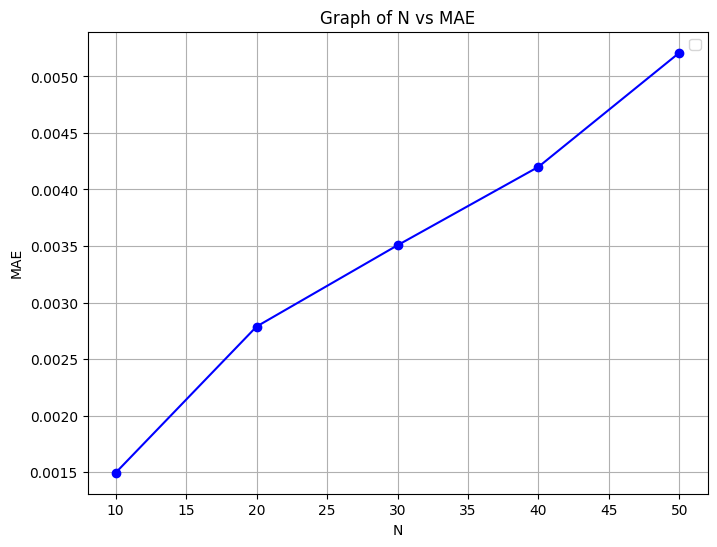

In [26]:
# Extract keys and values from the dictionary
keys = list(dict_mae.keys())
values = list(dict_mae.values())

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(keys, values, marker='o', color='b', linestyle='-')

# Add labels and title
plt.xlabel('N')
plt.ylabel('MAE')
plt.title('Graph of N vs MAE')
plt.legend()
# Display the plot
plt.grid(True)
plt.show()

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def cosine_similarity_sc(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    similarity = dot_product / (norm_vector1 * norm_vector2)
    return similarity
# Function to calculate MAE for Item-Item Recommender System
def item_item_recommendation(item_user_matrix, N):
    mae_scores = []
    for item in item_user_matrix.index:
        maes = []
        similar_items = find_similar_items(item, N)
        for user in item_user_matrix.columns:
            predicted_ratings = []
            if item_user_matrix.loc[item, user] == 0:  # For items not rated by user
                for train_item in similar_items:
                    predicted_ratings.append(item_user_matrix.loc[train_item, user])
                predicted_rating = np.mean(predicted_ratings)
                maes.append(predicted_rating)
            else:
                maes.append(0)
        mae_scores.append(np.mean(maes))
    return np.mean(mae_scores)

# Function to find top N similar items based on cosine similarity
def find_similar_items(item, N=10):
    similarities = cosine_similarity([item_user_matrix.loc[item]], item_user_matrix)[0]
    similar_items = item_user_matrix.index[np.argsort(similarities)[::-1][1:N+1]]  # Exclude the item itself
    return similar_items

# Create the item-user matrix
item_user_matrix = df_train.pivot_table(index='asin', columns='reviewerID', values='overall', fill_value=0)

# Calculate MAE for Item-Item Recommender System
mae_dict = {}

for N in [10, 20, 30, 40, 50]:
    mae = item_item_recommendation(item_user_matrix, N)
    print(f"MAE for Item-Item Recommender System with N={N}: {mae}")
    mae_dict[N] = mae


MAE for Item-Item Recommender System with N=10: 0.043581357877376055
MAE for Item-Item Recommender System with N=20: 0.03534285149688765
MAE for Item-Item Recommender System with N=30: 0.045681991492682136
MAE for Item-Item Recommender System with N=40: 0.03744580955059169
MAE for Item-Item Recommender System with N=50: 0.034672660804268354


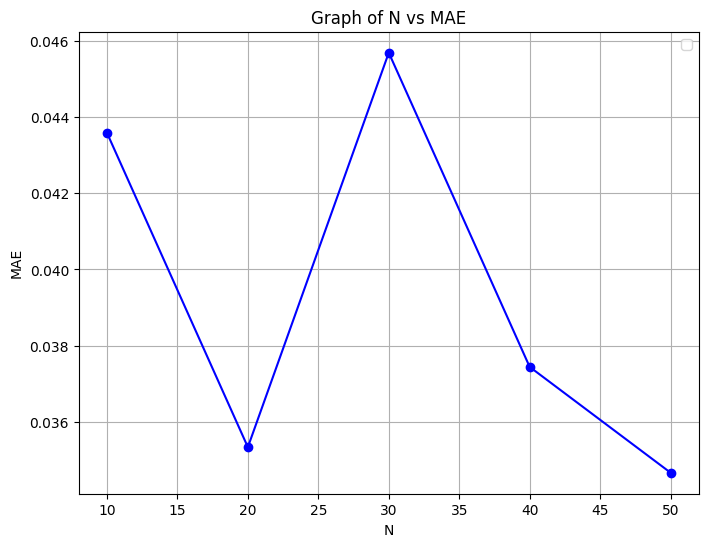

In [28]:
# Extract keys and values from the dictionary
keys = list(mae_dict.keys())
values = list(mae_dict.values())

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(keys, values, marker='o', color='b', linestyle='-')

# Add labels and title
plt.xlabel('N')
plt.ylabel('MAE')
plt.title('Graph of N vs MAE')
plt.legend()
# Display the plot
plt.grid(True)
plt.show()

here
MAE for Item-Item Recommender System with item=B00006345I: 0.05883778966131907
here
MAE for Item-Item Recommender System with item=B0001Q2DKS: 0.06167772139126306
here
MAE for Item-Item Recommender System with item=B000637RN4: 0.07715893577872746
here
MAE for Item-Item Recommender System with item=B000637RPC: 0.061743686868686865
here
MAE for Item-Item Recommender System with item=B0006PU71G: 0.0616771185435569


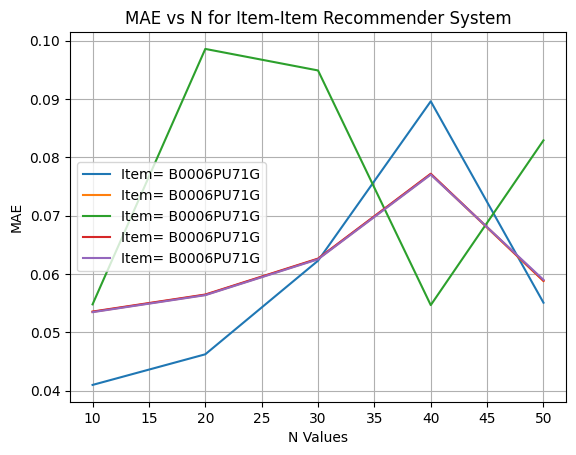

In [55]:
# Create the item-user matrix
item_user_matrix = df_filtered_reviews.pivot_table(index='asin', columns='reviewerID', values='overall', fill_value=0)
# print("Item-User Rating Matrix:")
# item_user_matrix
# Function to find top N similar items based on cosine similarity
def find_similar_items(item, N=10):
    # Calculate cosine similarity between the given item and all other items
    similarities = cosine_similarity([item_user_matrix.loc[item]], item_user_matrix)[0]
    
    # Sort items based on similarity (higher values first)
    similar_items = item_user_matrix.index[np.argsort(similarities)[::-1][1:N+1]]  # Exclude the item itself
    
    return similar_items
# Function to calculate MAE for Item-Item Recommender System
def item_item_recommendation(item):
    mae_scores = []
    dict_mae = {}
    for N in N_values:
        maes = []
        similar_items = find_similar_items(item, N)
        train_items, val_items = train_test_split(similar_items, test_size=0.2, random_state=42)
        for usert in item_user_matrix.columns:
            if item_user_matrix.loc[item, usert] == 0:  # For items not rated by user
                predicted_ratings = []   
                for train_item in train_items:
                    predicted_ratings.append(item_user_matrix.loc[train_item, usert])      
                predicted_rating = np.mean(predicted_ratings)
                actual_ratings = []   
                for val_item in val_items:
                    actual_ratings.append(item_user_matrix.loc[val_item, usert])      
                actual_rating = np.mean(actual_ratings)
                maes.append(abs(actual_rating - predicted_rating))
        mae = np.mean(maes)
        dict_mae[N] = mae
        mae_scores.append(mae)
    
    if any(m > 0 for m in mae_scores):  # Check if any MAE is greater than 0
        return dict_mae, np.mean(mae_scores)
    else:
        return None, None
N_values = [10, 20, 30, 40, 50]
item = 'B00006345I'  # Example item

# Example of using the Item-Item Recommender System
mae_data = []  # List to store MAE data for plotting

for item in item_user_matrix.index[:5]:
    print("here")
    mae = item_item_recommendation(item)
    
    if mae[0] is not None:  # Check if MAE data is available
        print(f"MAE for Item-Item Recommender System with item={item}: {mae[1]}")
        mae_data.append(mae)

# Plot MAE vs N for cases where MAE > 0
for data in mae_data:
    plt.plot(list(data[0].keys()), list(data[0].values()), label=f"Item= {item}")

plt.xlabel('N Values')
plt.ylabel('MAE')
plt.title('MAE vs N for Item-Item Recommender System')
plt.legend()
plt.grid(True) 
plt.show()

In [56]:
# Calculate the sum of ratings for each product across all users
product_sum_ratings = df_filtered_reviews.groupby('asin')['overall'].sum()

# Sort the products based on sum of ratings in descending order
top_10_products = product_sum_ratings.sort_values(ascending=False).head(10)

# Print the top 10 products by sum of ratings
print("Top 10 Products by User Sum Ratings:")
for rank, (product, rating_sum) in enumerate(top_10_products.items(), 1):
    print(f"{rank}. Product ID: {product}, Sum of Ratings: {rating_sum}")


Top 10 Products by User Sum Ratings:
1. Product ID: B01E16J6RQ, Sum of Ratings: 2762.0
2. Product ID: B00AQM8586, Sum of Ratings: 2465.0
3. Product ID: B007HSKSMI, Sum of Ratings: 1458.0
4. Product ID: B00KXVBB3Q, Sum of Ratings: 1171.0
5. Product ID: B0151K2AB0, Sum of Ratings: 1114.0
6. Product ID: B00JPBFC8U, Sum of Ratings: 842.0
7. Product ID: B005SN3INA, Sum of Ratings: 803.0
8. Product ID: B00RORBPCO, Sum of Ratings: 564.0
9. Product ID: B0006U3ACY, Sum of Ratings: 517.0
10. Product ID: B00KMRVGFO, Sum of Ratings: 496.0
